In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

In [6]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [4]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [15]:
test.dropna(inplace=True)
train.dropna(inplace=True)

In [16]:
X_train = train.iloc[:,:-1].values.reshape(-1,1)
Y_train = train.iloc[:,-1:].values.reshape(-1,1)

In [17]:
X_test = test.iloc[:,:-1].values.reshape(-1,1)
Y_test = test.iloc[:,-1:].values.reshape(-1,1)

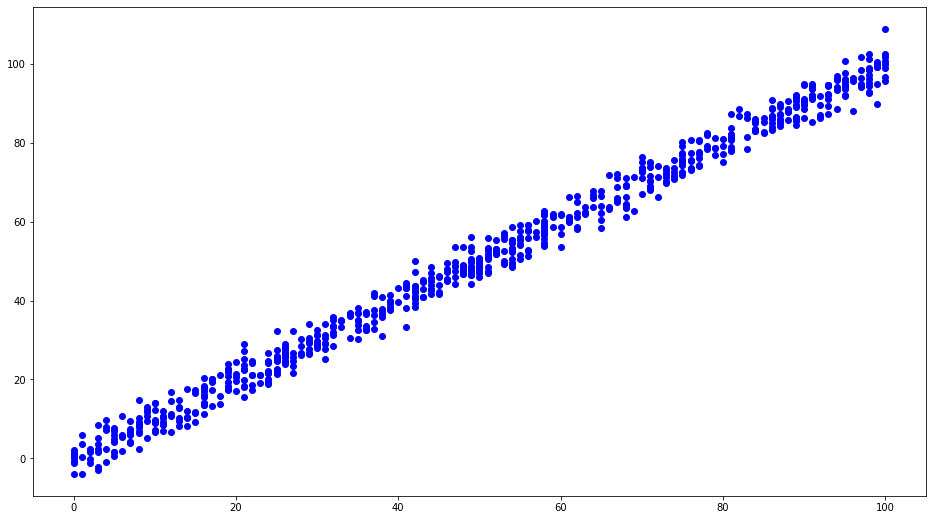

In [18]:
plt.figure(figsize=(16,9))
plt.scatter(X_train,Y_train,color="blue")
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
LR_Model = LinearRegression()

In [20]:
LR_Model.fit(X_train,Y_train)
print(LR_Model.intercept_,LR_Model.coef_)

[-0.10726546] [[1.00065638]]


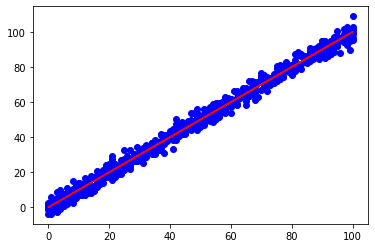

In [22]:
plt.scatter(X_train,Y_train,color="blue")
plt.plot(X_train,LR_Model.predict(X_train),color='red')
plt.show()

In [23]:
from sklearn import metrics

In [24]:
Y_pred = LR_Model.predict(X_test)
print('MSE {0}'.format(metrics.mean_squared_error(Y_test,Y_pred)))
print('RMSE {0}'.format(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))))

MSE 9.432922192039317
RMSE 3.0713062680298293


# class work

In [25]:
ccpp = pd.read_csv("././CCPP.csv")
ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [26]:
ccpp.dropna(inplace=True)

In [27]:
Y_ = ccpp.iloc[:,-1:].values.reshape(-1,1)
X_ = ccpp.iloc[:,:-1].values

In [28]:
LR_model2 = LinearRegression()

In [29]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X_,Y_,test_size=0.2,shuffle=True)

In [50]:
LR_model2.fit(x_train,y_train)
print(LR_model2.intercept_,LR_model2.coef_)

[454.76620578] [[-1.97665796 -0.23701916  0.06214152 -0.15896129]]


In [51]:
y_pred = LR_model2.predict(x_test)
print('MSE {0}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('RMSE {0}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

MSE 21.348506404555444
RMSE 4.620444394704415


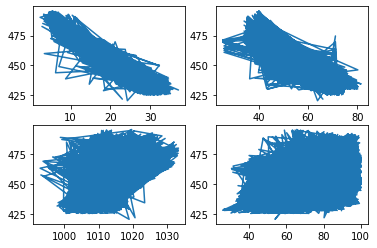

In [52]:
plt.subplot(2,2,1)
plt.plot(x_train[:,:1],y_train)
plt.subplot(2,2,2)
plt.plot(x_train[:,1:2],y_train)
plt.subplot(2,2,3)
plt.plot(x_train[:,2:3],y_train)
plt.subplot(2,2,4)
plt.plot(x_train[:,-1:],y_train)

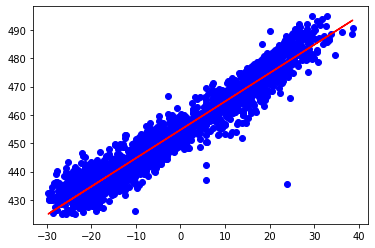

In [61]:
x_pred = np.matmul(x_test, np.transpose(LR_model2.coef_))
plt.plot(x_pred,y_pred,'red')
plt.scatter(x_pred,y_test,c='blue')
